In [1]:
!pip install sentencepiece

^C


In [2]:
from sklearn.model_selection import train_test_split
import sentencepiece as spm
import urllib.request
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf

You should consider upgrading via the 'C:\Users\Mu-jun\anaconda3\python.exe -m pip install --upgrade pip' command.


# Data cleaning

In [3]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt", filename="ratings_total.txt")

('ratings_total.txt', <http.client.HTTPMessage at 0x28329c92430>)

In [4]:
!wget https://github.com/jungyeul/korean-parallel-corpora/raw/master/korean-english-news-v1/korean-english-park.train.tar.gz

'wget'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [5]:
!tar -xzvf korean-english-park.train.tar.gz

tar: Error opening archive: Failed to open 'korean-english-park.train.tar.gz'


In [6]:
with open('korean-english-park.train.ko','r') as f:
    lines = f.readlines()
print(type(lines))

<class 'list'>


In [7]:
print(lines[:5])

['개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"\n', '모든 광마우스와 마찬가지 로 이 광마우스도 책상 위에 놓는 마우스 패드를 필요로 하지 않는다.\n', '그러나 이것은 또한 책상도 필요로 하지 않는다.\n', '79.95달러하는 이 최첨단 무선 광마우스는 허공에서 팔목, 팔, 그외에 어떤 부분이든 그 움직임에따라 커서의 움직임을 조절하는 회전 운동 센서를 사용하고 있다.\n', '정보 관리들은 동남 아시아에서의 선박들에 대한 많은 (테러) 계획들이 실패로 돌아갔음을 밝혔으며, 세계 해상 교역량의 거의 3분의 1을 운송하는 좁은 해로인 말라카 해협이 테러 공격을 당하기 쉽다고 경고하고 있다.\n']


In [8]:
lines = []
with open('ratings_total.txt','r') as f:
    for _ in range(5):
        line = f.readline()
        lines.append(line)
print(lines)

['5\t배공빠르고 굿\n', '2\t택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고\n', '5\t아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 엉성하긴 하지만 편하고 가성비 최고예요.\n', '2\t선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전화했더니 바로주신다했지만 배송도 누락되어있었네요.. 확인안하고 바로 선물했으면 큰일날뻔했네요..이렇게 배송이 오래걸렸으면 사는거 다시 생각했을거같아요 아쉽네요..\n', '5\t민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ\n']


In [9]:
import pandas as pd

In [10]:
ratings = pd.read_csv('ratings_total.txt', sep='\t',header=None)
ratings.head()

,0,1
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ


In [11]:
ratings[1][:5]

0                                              배공빠르고 굿
1                        택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2    아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3    선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4                    민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
Name: 1, dtype: object

In [12]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       200000 non-null  int64 
 1   1       200000 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.1+ MB


In [13]:
ratings.dropna(how='any',inplace=True)

In [14]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       200000 non-null  int64 
 1   1       200000 non-null  object
dtypes: int64(1), object(1)
memory usage: 4.6+ MB


In [15]:
cleaning_df = ratings.drop_duplicates(subset=[1])

In [16]:
cleaning_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199908 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       199908 non-null  int64 
 1   1       199908 non-null  object
dtypes: int64(1), object(1)
memory usage: 4.6+ MB


In [17]:
only_ko_df = cleaning_df.replace(to_replace=r'[^ㄱ-ㅎㅏ-ㅣ가-힣0-9 ]', value='', regex=True)

In [18]:
only_ko_df.head()

,0,1
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다 바느질이 조금 엉...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다 전화...
4,5,민트색상 예뻐요 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ


In [19]:
target = only_ko_df[0].replace({5:1,4:1,2:0,1:0})
target[:5]

0    1
1    0
2    1
3    0
4    1
Name: 0, dtype: int64

In [20]:
target.unique()

array([1, 0])

# Use SentencePiece

In [21]:
with open('spm_training_data.txt','w',encoding='utf8') as spdata:
    for text in only_ko_df[1]:
        spdata.write(text + '\n')
    with open('korean-english-park.train.ko','r') as f:
        lines = f.readlines()
        for line in lines:
            spdata.write(line)

with open('spm_training_data.txt','r') as f:
    lines = f.readlines()

lines[-5:]

['“우리는 3월 8일 김승연 회장과 그의 아들이 보복폭행에 가담한 혐의를 찾기 위해 총력을 기울이고 있다. ”고 남대문 경찰서는 어제 말했다.\n',
 '월요일 술집 종업원 6명은 김회장과 아들에게 폭행을 당했음을 진술했다고 경찰은 말했다.\n',
 '그러나 불충분한 증거 확보로 수사에 어려움이 있다.\n',
 '김회장과 그의 아들은 보복폭행 혐의를 강력히 부인하고 있다.\n',
 '경찰은 김회장의 집무실에서 추가 증거를 찾은 이후 가능한 한 오늘 김회장과 아들을 구속수사 할 방침이다.\n']

In [22]:
corpus = 'spm_training_data.txt'
prefix = 'spm_ko'
vocab_size = 8000

spm.SentencePieceTrainer.train(
    f"--input={corpus} --model_prefix={prefix} --vocab_size={vocab_size}" 
    + " --model_type=bpe"
    + " --max_sentence_length=999999" # 문장 최대 길이
)

In [23]:
s = spm.SentencePieceProcessor() # SentencePieceProcessor 인스턴스 생성
s.Load('spm_ko.model') # 모델 불러오기

def sp_tokenize(tokenizer, corpus, vocab):

    tensor = []

    for sen in corpus: # corpus의 요소를 sen에 넣으며 반복실행
        tensor.append(tokenizer.EncodeAsIds(sen)) # SentencePiece를 이용하여 sen을 인코딩하여 tensor에 추가

    with open(vocab, 'r') as f: # 불러온 모델의 단어장을 읽기시작
        vocab = f.readlines() # 단어장의 모든 줄을 읽어 들여서 vocab에 저장

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab): # vocab에 저장된 단어장의 각 줄을 인덱스와 같이 idx, line에 넣으며 반복실행
        word = line.split("\t")[0] # 단어장의 한 줄을 탭기준으로 분리하여 word에 첫 번째(0번) 요소만 저장

        word_index.update({idx:word}) # word_index에 idx를 키로 word를 값으로 저장
        index_word.update({word:idx}) # index_word에 word를 키로 idx를 값으로 저장

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')
    # tensor에 뒤쪽에 패드를 넣어 길이를 맞추고
    # 각 줄을 행으로 길이를 열로 하여 넘파이 배열을 만들다.

    return tensor, word_index, index_word

In [24]:
s_tensor_data, word2index, index2word = sp_tokenize(s, only_ko_df[1], "spm_ko.vocab")

In [25]:
len(word2index)

8000

In [26]:
word2index

{0: '<unk>',
 1: '<s>',
 2: '</s>',
 3: '니다',
 4: '▁이',
 5: '네요',
 6: '▁좋',
 7: '▁사',
 8: '▁그',
 9: '어요',
 10: '▁아',
 11: '는데',
 12: '▁있',
 13: '아요',
 14: '했다',
 15: '▁다',
 16: '하고',
 17: '▁잘',
 18: '에서',
 19: '▁가',
 20: '구매',
 21: '습니다',
 22: '으로',
 23: '▁안',
 24: '너무',
 25: '▁대',
 26: '배송',
 27: '▁너무',
 28: '▁보',
 29: '▁1',
 30: '▁지',
 31: '▁주',
 32: '▁배송',
 33: '▁하',
 34: '▁제',
 35: '▁재',
 36: '▁전',
 37: '▁수',
 38: '▁한',
 39: '▁것',
 40: '▁기',
 41: '▁2',
 42: '▁정',
 43: '▁시',
 44: '합니다',
 45: '▁부',
 46: '▁나',
 47: '해서',
 48: '▁않',
 49: '▁좋아요',
 50: '지만',
 51: '▁미',
 52: '다고',
 53: '▁조',
 54: '▁생',
 55: '▁같',
 56: '이라',
 57: '▁상',
 58: '▁없',
 59: '▁비',
 60: '▁재구매',
 61: '▁만',
 62: '▁오',
 63: '▁자',
 64: '▁마',
 65: '▁고',
 66: '▁구매',
 67: '▁일',
 68: '▁맛',
 69: '▁여',
 70: '▁사용',
 71: '▁많',
 72: '보다',
 73: '▁바',
 74: '해요',
 75: '▁말',
 76: '▁모',
 77: '▁“',
 78: '▁중',
 79: '했는데',
 80: '▁저',
 81: '▁위',
 82: '▁먹',
 83: '하는',
 84: '▁경',
 85: '▁더',
 86: '▁인',
 87: '아서',
 88: '하게',
 89: '00',
 90

In [27]:
index2word

{'<unk>': 0,
 '<s>': 1,
 '</s>': 2,
 '니다': 3,
 '▁이': 4,
 '네요': 5,
 '▁좋': 6,
 '▁사': 7,
 '▁그': 8,
 '어요': 9,
 '▁아': 10,
 '는데': 11,
 '▁있': 12,
 '아요': 13,
 '했다': 14,
 '▁다': 15,
 '하고': 16,
 '▁잘': 17,
 '에서': 18,
 '▁가': 19,
 '구매': 20,
 '습니다': 21,
 '으로': 22,
 '▁안': 23,
 '너무': 24,
 '▁대': 25,
 '배송': 26,
 '▁너무': 27,
 '▁보': 28,
 '▁1': 29,
 '▁지': 30,
 '▁주': 31,
 '▁배송': 32,
 '▁하': 33,
 '▁제': 34,
 '▁재': 35,
 '▁전': 36,
 '▁수': 37,
 '▁한': 38,
 '▁것': 39,
 '▁기': 40,
 '▁2': 41,
 '▁정': 42,
 '▁시': 43,
 '합니다': 44,
 '▁부': 45,
 '▁나': 46,
 '해서': 47,
 '▁않': 48,
 '▁좋아요': 49,
 '지만': 50,
 '▁미': 51,
 '다고': 52,
 '▁조': 53,
 '▁생': 54,
 '▁같': 55,
 '이라': 56,
 '▁상': 57,
 '▁없': 58,
 '▁비': 59,
 '▁재구매': 60,
 '▁만': 61,
 '▁오': 62,
 '▁자': 63,
 '▁마': 64,
 '▁고': 65,
 '▁구매': 66,
 '▁일': 67,
 '▁맛': 68,
 '▁여': 69,
 '▁사용': 70,
 '▁많': 71,
 '보다': 72,
 '▁바': 73,
 '해요': 74,
 '▁말': 75,
 '▁모': 76,
 '▁“': 77,
 '▁중': 78,
 '했는데': 79,
 '▁저': 80,
 '▁위': 81,
 '▁먹': 82,
 '하는': 83,
 '▁경': 84,
 '▁더': 85,
 '▁인': 86,
 '아서': 87,
 '하게': 88,
 '00': 89,
 '입

## data split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(
    s_tensor_data, target, test_size=0.1, stratify=target, random_state=7,
)
par_x_train, x_val, par_y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, stratify=y_train, random_state=7,
)

In [29]:
print(par_x_train.shape, x_val.shape, x_test.shape)

(143933, 109) (35984, 109) (19991, 109)


In [30]:
print(par_y_train[:10])

5721      1
65493     0
71928     1
112269    1
187915    1
179946    0
67914     1
68122     0
91116     1
140315    0
Name: 0, dtype: int64


In [31]:
print((par_x_train[0].dtype))

int32


In [32]:
type(list(par_x_train[0])[0])

numpy.int32

In [33]:
print(s.DecodeIds([12,12,12,14,616]))


있 있 있했다 아닌


In [34]:
(map(int,list(par_x_train[0])))

In [35]:
print(s.DecodeIds(list(map(int,par_x_train[0]))))

브라운사고 다시 삿어요 ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇ 


In [36]:
vocab_size = 10000
word_vector_dim = 200 # 보통 2의 배수로 지정

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(keras.layers.LSTM(16))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 200)         2000000   
                                                                 
 lstm (LSTM)                 (None, 16)                13888     
                                                                 
 dense (Dense)               (None, 10)                170       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                1

In [37]:
tf.random.set_seed(13)

model.compile(
    optimizer= 'adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
epochs = 20
hist = model.fit(par_x_train, par_y_train, epochs=epochs, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/20
4498/4498 [==============================] - 110s 24ms/step - loss: 0.6932 - accuracy: 0.5012 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/20
4498/4498 [==============================] - 108s 24ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/20
4498/4498 [==============================] - 110s 24ms/step - loss: 0.6932 - accuracy: 0.4978 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/20
4498/4498 [==============================] - 106s 24ms/step - loss: 0.6932 - accuracy: 0.4975 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/20
4498/4498 [==============================] - 105s 23ms/step - loss: 0.6932 - accuracy: 0.4979 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/20
4498/4498 [==============================] - 107s 24ms/step - loss: 0.6932 - accuracy: 0.4954 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/20
4498/4498 [==============================] - 108s 24ms/step - loss: 0.6932 - accuracy: 0.5008 - val_loss: 0

## 결과분석

In [38]:
result = model.evaluate(x_test, y_test, verbose=2)

625/625 - 5s - loss: 0.6932 - accuracy: 0.5000 - 5s/epoch - 8ms/step


In [39]:
history_dict = hist.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [40]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

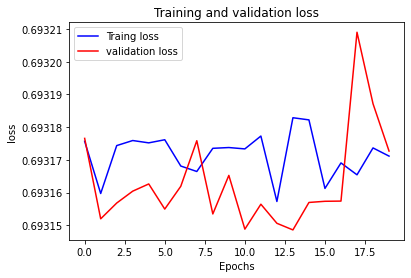

In [41]:
plt.plot(loss,c='b',label='Traing loss')
plt.plot(val_loss,c='r',label='validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

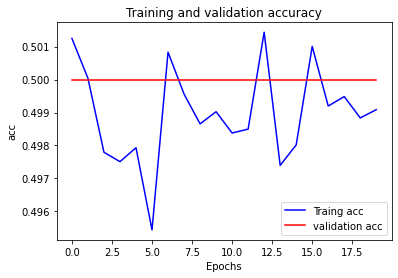

In [42]:
plt.plot(acc,c='b',label='Traing acc')
plt.plot(val_acc,c='r',label='validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

# Use Mecab

In [43]:
!pip install konlpy
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git 
%cd Mecab-ko-for-Google-Colab/
!bash install_mecab-ko_on_colab190912.sh
%cd ../

     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 448 kB 50.5 MB/s 
Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 115 (delta 11), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (115/115), 1.27 MiB | 5.99 MiB/s, done.
Resolving deltas: 100% (50/50), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2022-05-19 08:17:27--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c0:3470, 2406:da00:ff00::22e9:9f55, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Loc

In [44]:
from konlpy.tag import Mecab
mecab = Mecab()

In [45]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [46]:
def tokenize_and_remove_stopwords(data, stopwords, tokenizer):
    result = []

    for sentence in data:
        curr_data = []
        try:
            curr_data = tokenizer.morphs(sentence) # mecab 형태소 분석 tokenizer
        except:
            curr_data = tokenizer.EncodeAsPieces(sentence)
        curr_data = [word for word in curr_data if not word in stopwords] # 불용어 제거
        result.append(curr_data)
    return result

In [47]:
import numpy as np
from collections import Counter

def make_tensor(data, stopwords, tokenizer):
    data = tokenize_and_remove_stopwords(data, stopwords, tokenizer)

    # 단어장 만드는 중...
    words = np.concatenate(data).tolist()
    counter = Counter(words)
    counter = counter.most_common(10000-4)
    vocab = ['<PAD>', '<BOS>', '<UNK>', '<UNUSED>'] + [key for key, _ in counter]
    word_to_index = {word:index for index, word in enumerate(vocab)}
    index_to_word = {index:word for word, index in word_to_index.items()}

    def wordlist_to_indexlist(wordlist):
        return [word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in wordlist]
    
    tensor = list(map(wordlist_to_indexlist, data))

    return tensor, word_to_index, index_to_word

In [48]:
mecab_tensor, word_to_index, index_to_word = make_tensor(only_ko_df[1], stopwords, mecab)

In [49]:
# 데이터 셋 내 문장 길이 분포
total_data_text = list(mecab_tensor)

# 텍스트데이터 문장길이의 리스트를 생성한 후
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)

# 문장 길이의 평균값, 최대값, 표준편차를 계산
print('문장길이 평균 :', np.mean(num_tokens))
print('문장길이 최대 :', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

# 예를 들면 최대길이를 (평균 + 2*표준편차)로 한다면,
max_tokens = np.mean(num_tokens) +2 * np.std(num_tokens)

maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print('전체 문장의 {}%가 maxlen 설정값 이내에 포함됩니다. '.format(np.sum(num_tokens < max_tokens)/len(num_tokens)))

문장길이 평균 : 16.673744922664426
문장길이 최대 : 87
문장길이 표준편차 :  12.120196995453558
pad_sequences maxlen :  40
전체 문장의 0.939837325169578%가 maxlen 설정값 이내에 포함됩니다. 


In [50]:
# 패딩 추가
mecab_tensor = keras.preprocessing.sequence.pad_sequences(mecab_tensor, value=word_to_index['<PAD>'], padding='pre', maxlen=maxlen)

## data split

In [51]:
x_train, x_test, y_train, y_test = train_test_split(
    mecab_tensor, target, test_size=0.1, stratify=target, random_state=7,
)
par_x_train, x_val, par_y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, stratify=y_train, random_state=7,
)

In [52]:
vocab_size = 10000
word_vector_dim = 200 # 보통 2의 배수로 지정

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(keras.layers.LSTM(16))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 200)         2000000   
                                                                 
 lstm_1 (LSTM)               (None, 16)                13888     
                                                                 
 dense_4 (Dense)             (None, 10)                170       
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dropout_3 (Dropout)         (None, 10)                0         
                                                                 
 dense_6 (Dense)             (None, 10)               

In [53]:
tf.random.set_seed(13)

model.compile(
    optimizer= 'adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
epochs = 20
hist = model.fit(par_x_train, par_y_train, epochs=epochs, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/20
4498/4498 [==============================] - 76s 16ms/step - loss: 0.2839 - accuracy: 0.8937 - val_loss: 0.2368 - val_accuracy: 0.9123
Epoch 2/20
4498/4498 [==============================] - 65s 14ms/step - loss: 0.2099 - accuracy: 0.9240 - val_loss: 0.2302 - val_accuracy: 0.9152
Epoch 3/20
4498/4498 [==============================] - 64s 14ms/step - loss: 0.1819 - accuracy: 0.9333 - val_loss: 0.2436 - val_accuracy: 0.9133
Epoch 4/20
4498/4498 [==============================] - 65s 14ms/step - loss: 0.1588 - accuracy: 0.9421 - val_loss: 0.2468 - val_accuracy: 0.9102
Epoch 5/20
4498/4498 [==============================] - 65s 14ms/step - loss: 0.1403 - accuracy: 0.9483 - val_loss: 0.2669 - val_accuracy: 0.9094
Epoch 6/20
4498/4498 [==============================] - 65s 14ms/step - loss: 0.1266 - accuracy: 0.9526 - val_loss: 0.2736 - val_accuracy: 0.9086
Epoch 7/20
4498/4498 [==============================] - 64s 14ms/step - loss: 0.1143 - accuracy: 0.9572 - val_loss: 0.2883 -

## 결과분석

In [54]:
result = model.evaluate(x_test, y_test, verbose=2)

625/625 - 3s - loss: 0.4324 - accuracy: 0.9013 - 3s/epoch - 4ms/step


In [55]:
history_dict = hist.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [56]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

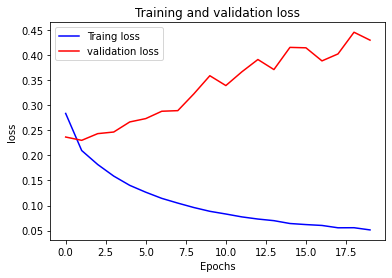

In [57]:
plt.plot(loss,c='b',label='Traing loss')
plt.plot(val_loss,c='r',label='validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

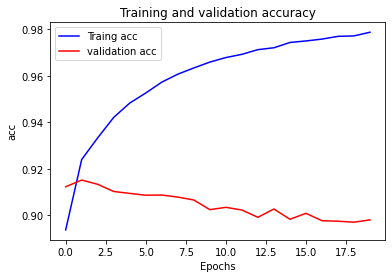

In [58]:
plt.plot(acc,c='b',label='Traing acc')
plt.plot(val_acc,c='r',label='validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

# 동일한 길이 조건으로 결과 분석

In [59]:
mecab_tensor, word_to_index, index_to_word = make_tensor(only_ko_df[1], stopwords, mecab)

In [60]:
mecab_tensor = keras.preprocessing.sequence.pad_sequences(mecab_tensor, value=word_to_index['<PAD>'], padding='pre', maxlen=109)

In [61]:
x_train, x_test, y_train, y_test = train_test_split(
    mecab_tensor, target, test_size=0.1, stratify=target, random_state=7,
)
par_x_train, x_val, par_y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, stratify=y_train, random_state=7,
)

In [62]:
par_x_train.shape

(143933, 109)

In [63]:
vocab_size = 10000
word_vector_dim = 200 # 보통 2의 배수로 지정

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(keras.layers.LSTM(16))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 200)         2000000   
                                                                 
 lstm_2 (LSTM)               (None, 16)                13888     
                                                                 
 dense_8 (Dense)             (None, 10)                170       
                                                                 
 dropout_4 (Dropout)         (None, 10)                0         
                                                                 
 dense_9 (Dense)             (None, 10)                110       
                                                                 
 dropout_5 (Dropout)         (None, 10)                0         
                                                                 
 dense_10 (Dense)            (None, 10)               

In [ ]:
tf.random.set_seed(13)

model.compile(
    optimizer= 'adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
epochs = 20
hist = model.fit(par_x_train, par_y_train, epochs=epochs, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/20
4498/4498 [==============================] - 109s 24ms/step - loss: 0.2820 - accuracy: 0.8946 - val_loss: 0.2354 - val_accuracy: 0.9144
Epoch 2/20
4498/4498 [==============================] - 106s 24ms/step - loss: 0.2094 - accuracy: 0.9239 - val_loss: 0.2289 - val_accuracy: 0.9157
Epoch 3/20
4498/4498 [==============================] - 106s 24ms/step - loss: 0.1806 - accuracy: 0.9346 - val_loss: 0.2360 - val_accuracy: 0.9161
Epoch 4/20
4498/4498 [==============================] - 106s 24ms/step - loss: 0.1574 - accuracy: 0.9432 - val_loss: 0.2399 - val_accuracy: 0.9128
Epoch 5/20
4498/4498 [==============================] - 106s 24ms/step - loss: 0.1378 - accuracy: 0.9495 - val_loss: 0.2556 - val_accuracy: 0.9124
Epoch 6/20
4498/4498 [==============================] - 106s 23ms/step - loss: 0.1243 - accuracy: 0.9539 - val_loss: 0.2640 - val_accuracy: 0.9098
Epoch 7/20
4498/4498 [==============================] - 106s 24ms/step - loss: 0.1124 - accuracy: 0.9574 - val_loss: 0

## 결과분석

In [ ]:
result = model.evaluate(x_test, y_test, verbose=2)

In [ ]:
history_dict = hist.history
print(history_dict.keys())

In [ ]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

In [ ]:
plt.plot(loss,c='b',label='Traing loss')
plt.plot(val_loss,c='r',label='validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
plt.plot(acc,c='b',label='Traing acc')
plt.plot(val_acc,c='r',label='validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

# SentencePiece 학습 쿠퍼스를 쇼핑데이터만으로 제한

In [ ]:
with open('shopping_review.txt','w',encoding='utf8') as spdata:
    for text in only_ko_df[1]:
        spdata.write(text + '\n')

In [ ]:
corpus = 'shopping_review.txt'
prefix = 'shopping_review'
vocab_size = 8000

spm.SentencePieceTrainer.train(
    f"--input={corpus} --model_prefix={prefix} --vocab_size={vocab_size}" 
    + " --model_type=bpe"
    + " --max_sentence_length=999999" # 문장 최대 길이
)

In [ ]:
sp = spm.SentencePieceProcessor() # SentencePieceProcessor 인스턴스 생성
sp.Load('shopping_review.model') # 모델 불러오기

In [ ]:
sp_tensor_data, word2index, index2word = sp_tokenize(sp, only_ko_df[1], "shopping_review.vocab")

In [ ]:
tensor_data.shape

In [ ]:
len(word2index)

In [ ]:
tensor_data

## data split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    sp_tensor_data, target, test_size=0.1, stratify=target, random_state=7,
)
par_x_train, x_val, par_y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, stratify=y_train, random_state=7,
)

In [ ]:
par_x_train[5]

In [ ]:
print(sp.DecodeIds(list(map(int,par_x_train[0]))))

In [ ]:
vocab_size = 10000
word_vector_dim = 200 # 보통 2의 배수로 지정

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(keras.layers.LSTM(16))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

In [ ]:
tf.random.set_seed(13)

model.compile(
    optimizer= 'adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
epochs = 20
hist = model.fit(par_x_train, par_y_train, epochs=epochs, batch_size=32, validation_data=(x_val, y_val))

## 결과분석

In [ ]:
result = model.evaluate(x_test, y_test, verbose=2)

In [ ]:
history_dict = hist.history
print(history_dict.keys())

In [ ]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

In [ ]:
plt.plot(loss,c='b',label='Traing loss')
plt.plot(val_loss,c='r',label='validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
plt.plot(acc,c='b',label='Traing acc')
plt.plot(val_acc,c='r',label='validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [ ]:
print(word_to_index)

# 토큰화 함수변경

In [ ]:
s_tensor, word_to_index, index_to_word = make_tensor(only_ko_df[1], stopwords, s)

In [ ]:
s_tensor = keras.preprocessing.sequence.pad_sequences(s_tensor, value=word_to_index['<PAD>'], padding='pre')

In [ ]:
word_to_index['<PAD>']

In [ ]:
type(word_to_index)

In [ ]:
word_to_index

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    s_tensor, target, test_size=0.1, stratify=target, random_state=7,
)
par_x_train, x_val, par_y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, stratify=y_train, random_state=7,
)

In [ ]:
par_x_train.shape

In [ ]:
print(sp.DecodeIds(list(map(int,par_x_train[0]))))

In [ ]:
vocab_size = 10000
word_vector_dim = 200 # 보통 2의 배수로 지정

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(keras.layers.LSTM(16))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
# model.summary()

In [ ]:
tf.random.set_seed(13)

model.compile(
    optimizer= 'adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
epochs = 20
hist = model.fit(par_x_train, par_y_train, epochs=epochs, batch_size=32, validation_data=(x_val, y_val))

## 결과 분석

In [ ]:
result = model.evaluate(x_test, y_test, verbose=2)

In [ ]:
history_dict = hist.history
print(history_dict.keys())

In [ ]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

In [ ]:
plt.plot(loss,c='b',label='Traing loss')
plt.plot(val_loss,c='r',label='validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
plt.plot(acc,c='b',label='Traing acc')
plt.plot(val_acc,c='r',label='validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

# post padding에서 pre padding으로 변경

In [ ]:
def sp_tokenize(tokenizer, corpus, vocab):

    tensor = []

    for sen in corpus: # corpus의 요소를 sen에 넣으며 반복실행
        tensor.append(tokenizer.EncodeAsIds(sen)) # SentencePiece를 이용하여 sen을 인코딩하여 tensor에 추가

    with open(vocab, 'r') as f: # 불러온 모델의 단어장을 읽기시작
        vocab = f.readlines() # 단어장의 모든 줄을 읽어 들여서 vocab에 저장

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab): # vocab에 저장된 단어장의 각 줄을 인덱스와 같이 idx, line에 넣으며 반복실행
        word = line.split("\t")[0] # 단어장의 한 줄을 탭기준으로 분리하여 word에 첫 번째(0번) 요소만 저장

        word_index.update({idx:word}) # word_index에 idx를 키로 word를 값으로 저장
        index_word.update({word:idx}) # index_word에 word를 키로 idx를 값으로 저장

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='pre')
    # tensor에 뒤쪽에 패드를 넣어 길이를 맞추고
    # 각 줄을 행으로 길이를 열로 하여 넘파이 배열을 만들다.

    return tensor, word_index, index_word

In [ ]:
s_tensor_data, word2index, index2word = sp_tokenize(s, only_ko_df[1], "spm_ko.vocab")

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(
    s_tensor_data, target, test_size=0.1, stratify=target, random_state=7,
)
par_x_train, x_val, par_y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, stratify=y_train, random_state=7,
)

In [ ]:
vocab_size = 10000
word_vector_dim = 200 # 보통 2의 배수로 지정

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(keras.layers.LSTM(16))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
# model.summary()

In [ ]:
tf.random.set_seed(13)

model.compile(
    optimizer= 'adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
epochs = 20
hist = model.fit(par_x_train, par_y_train, epochs=epochs, batch_size=32, validation_data=(x_val, y_val))

## 결과 분석

In [ ]:
result = model.evaluate(x_test, y_test, verbose=2)

In [ ]:
history_dict = hist.history
print(history_dict.keys())

In [ ]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

In [ ]:
plt.plot(loss,c='b',label='Traing loss')
plt.plot(val_loss,c='r',label='validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
plt.plot(acc,c='b',label='Traing acc')
plt.plot(val_acc,c='r',label='validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()